<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/7-ensemble-learning-and-random-forests/02_boosting_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Boosting fundamentals

If you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of predictors
is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.

Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

There are many boosting methods available, but by far the most popular are

* AdaBoost(short for Adaptive Boosting)
* Gradient Boosting

In fact, the winning solutions in Machine Learning competitions
often involve several Ensemble methods (most famously in the Netflix Prize
competition).



##Setup

In [1]:
# Common imports
import numpy as np
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons
from sklearn.datasets import load_iris

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [4]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot, interpolation="nearest")
    plt.axis("off")

In [2]:
X, y = make_moons(n_samples=500, noise=0.5, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

##AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predictors
focusing more and more on the hard cases. This is the technique used by
AdaBoost.

Let's trains an `AdaBoost` classifier based on 200 Decision Stumps using
Scikit-Learn’s `AdaBoostClassifier` class (as you might expect, there is also an Ada
`BoostRegressor` class). 

A Decision Stump is a Decision Tree with `max_depth=1`—in
other words, a tree composed of a single decision node plus two leaf nodes. 

This is the default base estimator for the `AdaBoostClassifier` class:

In [5]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm="SAMME.R",
                             learning_rate=0.5,
                             random_state=42)

ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

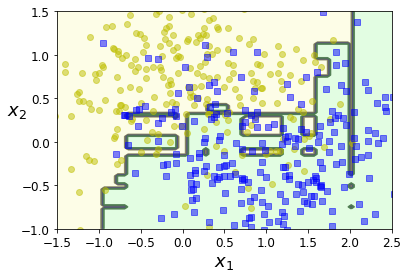

In [6]:
plot_decision_boundary(ada_clf, X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()


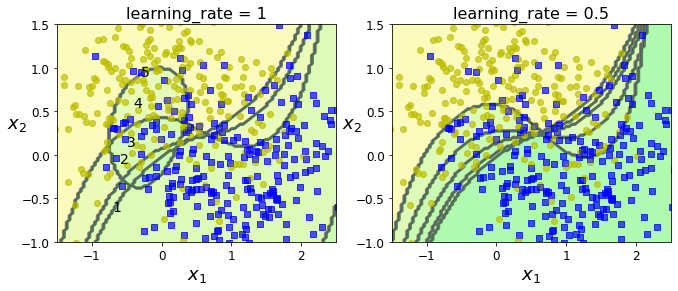

In [8]:
m = len(x_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(x_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(x_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

plt.show()

As you can see, this sequential learning technique has some
similarities with Gradient Descent, except that instead of tweaking a single predictor’s
parameters to minimize a cost function, AdaBoost adds predictors to the ensemble,
gradually making it better.

Once all predictors are trained, the ensemble makes predictions very much like bagging
or pasting, except that predictors have different weights depending on their
overall accuracy on the weighted training set.



##Gradient Boosting

In [ ]:
X, y = make_moons(n_samples=500, noise=0.5, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)], voting="hard")
voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

Let’s look at each classifier’s accuracy on the test set:

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.816
RandomForestClassifier 0.712
SVC 0.792
VotingClassifier 0.8


There you have it! The voting classifier slightly outperforms all the individual classifiers.

If all classifiers are able to estimate class probabilities (i.e., they all have a pre
dict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called soft
voting.

It often achieves higher performance than hard voting because it gives more
weight to highly confident votes. All you need to do is replace voting="hard" with
voting="soft" and ensure that all classifiers can estimate class probabilities.

If you modify the preceding code to use soft voting, you will find that the voting classifier achieves over 91.2% accuracy!

In [ ]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42) 
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)], voting="soft")
voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.816
RandomForestClassifier 0.712
SVC 0.792
VotingClassifier 0.784


##Bagging and Pasting

As we knew, the Voting classifiers use very different training algorithms.

While Bagging and Pasting classifiers use the same training algorithm for every
predictor and train them on different random subsets of the training set.

When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating). 

When sampling is performed without replacement, it is called pasting.

In other words, both bagging and pasting allow training instances to be sampled several
times across multiple predictors, but only bagging allows training instances to be
sampled several times for the same predictor.

Once all predictors are trained, the ensemble can make a prediction for a new
instance by simply aggregating the predictions of all predictors. The aggregation
function is typically the statistical mode (i.e., the most frequent prediction, just like a
hard voting classifier) for classification, or the average for regression. Each individual
predictor has a higher bias than if it were trained on the original training set, but
aggregation reduces both bias and variance.

Similarly, predictions can be made in parallel.
This is one of the reasons bagging and pasting are such popular methods: they scale
very well.

Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
sifier class (or BaggingRegressor for regression).

Let's trains an
ensemble of 500 Decision Tree classifiers: each is trained on 100 training instances
randomly sampled from the training set with replacement (this is an example of bagging,
but if you want to use pasting instead, just set `bootstrap=False`).

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=40)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.768


And let's train a single Decision Tree with the decision
boundary of a bagging ensemble of 500 trees.

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))

0.696


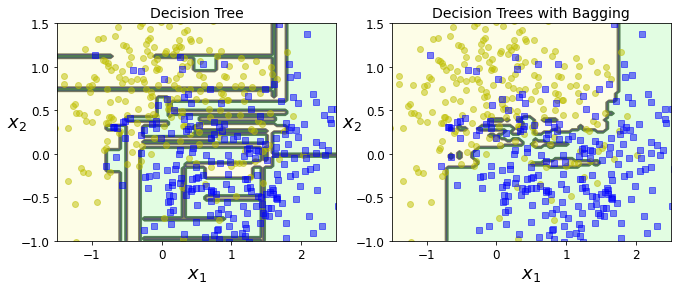

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

As you can see, the ensemble’s predictions will likely
generalize much better than the single Decision Tree’s predictions: the ensemble has a
comparable bias but a smaller variance (it makes roughly the same number of errors
on the training set, but the decision boundary is less irregular).

Bootstrapping introduces a bit more diversity in the subsets that each predictor is
trained on, so bagging ends up with a slightly higher bias than pasting; but the extra
diversity also means that the predictors end up being less correlated, so the ensemble’s
variance is reduced.

Overall, bagging often results in better models, which explains
why it is generally preferred.

##Out-of-Bag Evaluation

With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all.

By default a BaggingClassifier samples `m`
training instances with replacement (`bootstrap=True`), where `m` is the size of the training set. 

This means that only about `63%` of the training instances are sampled on
average for each predictor. The remaining `37%` of the training instances that are not sampled are called out-of-bag (oob) instances. 

Note that they are not the same `37%` for all predictors.

**Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set**. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.

In Scikit-Learn, you can set `oob_score=True` when creating a `BaggingClassifier` to
request an automatic oob evaluation after training.

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                            n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            n_jobs=-1,
                            random_state=40)

bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.8053333333333333

According to this oob evaluation, this `BaggingClassifier` is likely to achieve about
`90.1%` accuracy on the test set.

In [ ]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.776

The oob decision function for each training instance is also available through the
`oob_decision_function_` variable.

In [ ]:
bag_clf.oob_decision_function_

For example, the oob evaluation estimates that the second training
instance has a 49.25% probability of belonging to the positive class (and 50.75% of belonging to the negative class).

##Random Forests

Random Forest is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with `max_samples` set to the size of the training set.

Instead of building a `BaggingClassifier` and passing
it a `DecisionTreeClassifier`, you can instead use the `RandomForestClassifier` class, which is more convenient and optimized for Decision Trees (similarly, there is a `RandomForestRegressor` class for regression tasks).



In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=6, n_jobs=-1, random_state=42)
rnd_clf.fit(x_train, y_train)

y_pred_rf = rnd_clf.predict(x_test)

With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node.it
searches for the best feature among a random subset of features. The algorithm
results in greater tree diversity, which (again) trades a higher bias for a lower variance,
generally yielding an overall better model.

The following `BaggingClassifier`
is roughly equivalent to the previous `RandomForestClassifier`:

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [ ]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.96

##Feature Importance

Yet another great quality of Random Forests is that they make it easy to measure the
relative importance of each feature. 

Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). 

More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it.

Scikit-Learn computes this score automatically for each feature after training, then it
scales the results so that the sum of all importances is equal to 1. You can access the
result using the `feature_importances_` variable.

In [ ]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(n_estimators=10, random_state=42)

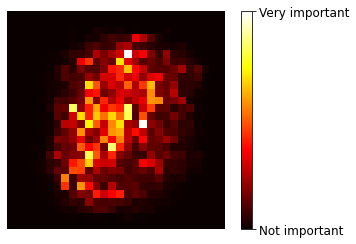

In [ ]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

Similarly, if you train a Random Forest classifier on the IRIS dataset.

In [ ]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


It seems that the most important features are the
petal length (44%) and width (42%), while sepal length and width are rather unimportant
in comparison (11% and 2%, respectively).

In [ ]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

Random Forests are very handy to get a quick understanding of what features
actually matter, in particular if you need to perform feature selection.